""" Created: 13-Jul-2021

@author: Deb """

""" 
PREVENTING BANK CUSTOMER CHURN!

Create a model to identify if customer is going to churn in next 6 months based on the independent variables

Total number of Records: 10000
Number of variables: 14
Exited == 1 : 2037
"""


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cust_base = pd.read_csv("Churn_Modelling.csv")
cust_base.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
cust_base['CustomerId'].isnull().sum()

0

In [9]:
cust_base['CustomerId'].drop_duplicates().count()

10000

In [26]:
cust_base.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Correlation check for all columns with Exited

In [31]:
cust_base.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


No Correlation found!

<AxesSubplot:>

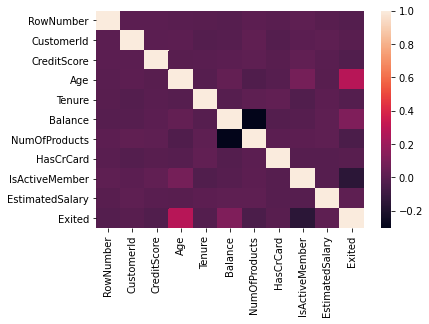

In [30]:
sns.heatmap(cust_base.corr())

Need to identify redundant columns from independent variable list

In [27]:
cust_base.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
list_cols = cust_base.columns.values.tolist()
list_cols

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

Identify variables could have an impact on 'Exited'
RowNumber, CustomerId, Surname unlikely to have an impact on Depedent variable, hence could be removed

In [13]:
cust_base1 = cust_base.drop(['RowNumber','CustomerId','Surname'], axis=1)
cust_base1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Since all the variables are of numeric in nature, hence we could directly apply machine learning model
 -- except Geography and Gender, even they are categorical in nature so could be encoded
 -- Steps:
 
     . Extract Geography and Gender and make it one-hot encoded
     
     . concatenating with existing dataset with all numeric columns except Geography and Gender

In [14]:
cust_base1 = cust_base1.drop(['Geography','Gender'], axis=1)

In [17]:
geog = pd.get_dummies(cust_base.Geography,drop_first=True)
geog.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [19]:
gendr = pd.get_dummies(cust_base.Gender,drop_first=True)
gendr.head()

,Male
0,0
1,0
2,0
3,0
4,0


Concatenating to get all required columns

In [24]:
cust_base1 = pd.concat([cust_base1,geog,gendr],axis=1)
cust_base1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male', 'Germany', 'Spain', 'Male'],
      dtype='object')

### Preprocessing steps

In [23]:
X = cust_base1.drop(['Exited'],axis=1)
y = cust_base1['Exited']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Applying Simple RandomForest Algorithm

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

### Evaluation

In [29]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1991
           1       0.74      0.52      0.61       509

    accuracy                           0.87      2500
   macro avg       0.81      0.74      0.76      2500
weighted avg       0.86      0.87      0.86      2500

0.8656
